In [20]:
import gensim.downloader as api
import matplotlib.pyplot as plt

In [21]:
%%time
kv = api.load("word2vec-google-news-300")
kv.fill_norms()

CPU times: user 20.6 s, sys: 2.71 s, total: 23.3 s
Wall time: 23.5 s


In [34]:
print("sim(aspirin, ibuprofen) =", kv.similarity("aspirin", "ibuprofen"))

sim(aspirin, ibuprofen) = 0.72359025


In [23]:
def plot_neighbors(word, topn=12):
    pairs = kv.most_similar(word, topn=topn)
    labels = [w for w,_ in pairs]
    scores = [s for _,s in pairs]
    plt.figure(figsize=(8,4))
    plt.barh(range(len(labels)), scores)
    plt.gca().invert_yaxis()
    plt.yticks(range(len(labels)), labels)
    plt.title(f"Top-{topn} neighbors of “{word}” (cosine)")
    plt.xlabel("cosine similarity")
    plt.tight_layout(); plt.show()

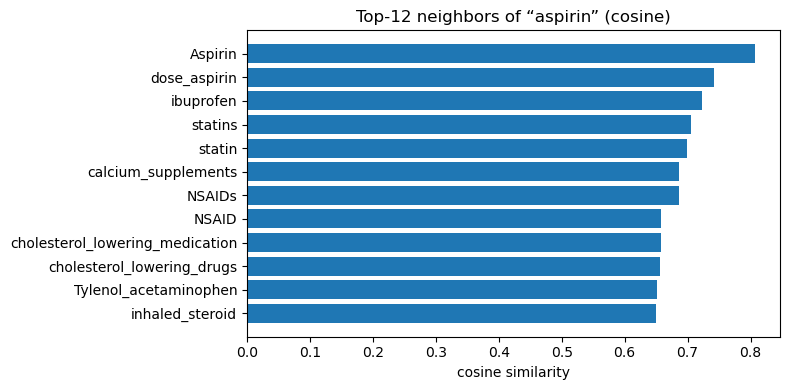

In [24]:
plot_neighbors("aspirin", topn=12)

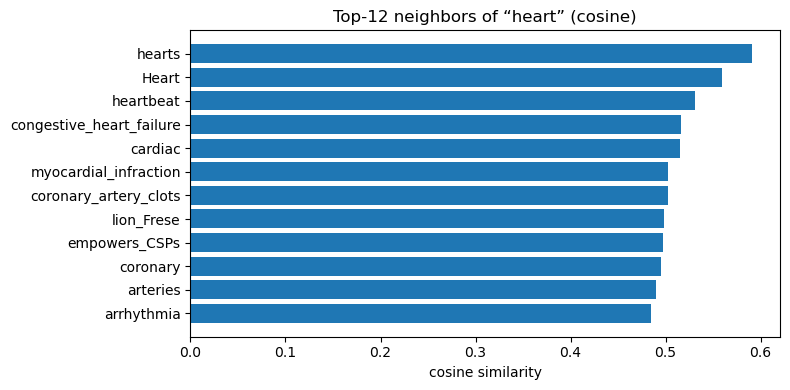

In [25]:
plot_neighbors("heart", topn=12)

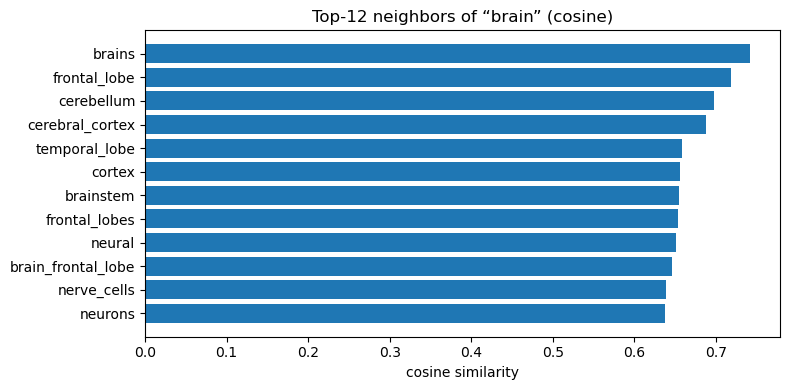

In [26]:
plot_neighbors("brain", topn=12)

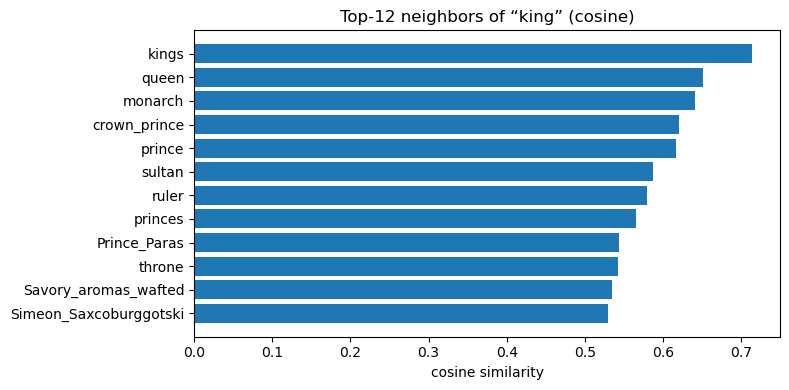

In [27]:
plot_neighbors("king", topn=12)

In [28]:
# b − a + c
def analogy(b, a, c, topn=5):
    try:
        return kv.most_similar(positive=[b, c], negative=[a], topn=topn)
    except KeyError:
        return []

In [29]:
#cardiology − heart + brain -> expect to see neurology
print("Analogy (cardiology − heart + brain):", analogy("cardiology", "heart", "brain", topn=5))

Analogy (cardiology − heart + brain): [('neurology', 0.6247603297233582), ('neurosurgery', 0.5744871497154236), ('neurobiology', 0.5635653138160706), ('neuroscience', 0.5633310675621033), ('radiology', 0.5619978904724121)]


In [30]:
#king − man + woman -> expect to see queen
print("Analogy (king − man + woman):", analogy("king", "man", "woman", topn=5))

Analogy (king − man + woman): [('queen', 0.7118192911148071), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133)]


In [31]:
# Paris − France + Italy -> expect to see Rome
print("Analogy (Paris − France + Italy):", analogy("Paris", "France", "Italy", topn=5))

Analogy (Paris − France + Italy): [('Milan', 0.7222140431404114), ('Rome', 0.702830970287323), ('Palermo_Sicily', 0.5967571139335632), ('Italian', 0.5911272764205933), ('Tuscany', 0.5632812976837158)]


In [32]:
# doctor − hospital + school -> expect to see teacher
print("Analogy (doctor − hospital + school):", analogy("doctor", "hospital", "school", topn=5))

Analogy (doctor − hospital + school): [('guidance_counselor', 0.5969595313072205), ('teacher', 0.5755364298820496), ('eighth_grade', 0.5226408243179321), ('schoolers', 0.5168289542198181), ('elementary', 0.5085657238960266)]


In [33]:
# Sometimes there's a lack of quality models, such as those trained on databases and articles, so models can be specifically trained on domain-specific data.
# https://github.com/ncbi-nlp/BioSentVec